In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df = pd.read_csv("/content/sample_data/mnist_train_small.csv",
                 header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


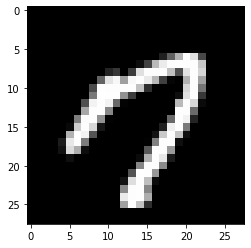

In [ ]:
m = df.iloc[2, 1:].to_numpy().reshape(28, 28)
plt.imshow(m, cmap='gray')

In [ ]:
df2 = df[(df[0]==7) | (df[0]==1)]

In [ ]:
X = df2.iloc[:, 1:]
y = df2[0]

In [ ]:
X.shape

(4369, 784)

In [ ]:
y.shape

(4369,)

In [ ]:
#val cross cv=5
#decisiontree max_depth=4
#Dibujar árboles

In [ ]:
r = cross_validate(DecisionTreeRegressor(),
                   X,y, cv=5, scoring='neg_mean_squared_error',
                   return_train_score = True, return_estimator=True
                   )
r

{'fit_time': array([0.32977128, 0.48531079, 0.96064281, 1.02677679, 1.38777089]),
 'score_time': array([0.00805807, 0.01998043, 0.03578019, 0.06876683, 0.02829337]),
 'estimator': [DecisionTreeRegressor(),
  DecisionTreeRegressor(),
  DecisionTreeRegressor(),
  DecisionTreeRegressor(),
  DecisionTreeRegressor()],
 'test_score': array([-0.41189931, -0.49427918, -0.37070938, -0.53546911, -0.94845361]),
 'train_score': array([-0., -0., -0., -0., -0.])}

[Text(0.4879032258064516, 0.9166666666666666, 'X[378] <= 160.5\nsquared_error = 8.994\nsamples = 3495\nvalue = 3.924'),
 Text(0.24193548387096775, 0.75, 'X[159] <= 0.5\nsquared_error = 1.42\nsamples = 1677\nvalue = 6.753'),
 Text(0.16129032258064516, 0.5833333333333334, 'X[155] <= 48.0\nsquared_error = 0.915\nsamples = 1648\nvalue = 6.843'),
 Text(0.0967741935483871, 0.4166666666666667, 'X[124] <= 15.5\nsquared_error = 0.397\nsamples = 1612\nvalue = 6.933'),
 Text(0.06451612903225806, 0.25, 'X[162] <= 2.0\nsquared_error = 0.179\nsamples = 1602\nvalue = 6.97'),
 Text(0.03225806451612903, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.0967741935483871, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.12903225806451613, 0.25, 'squared_error = 0.0\nsamples = 10\nvalue = 1.0'),
 Text(0.22580645161290322, 0.4166666666666667, 'X[437] <= 147.5\nsquared_error = 7.639\nsamples = 36\nvalue = 2.833'),
 Text(0.1935483870967742, 0.25, 'X[300] <= 7.0\nsquared_error = 2.469\nsamples = 27\nvalue = 1.444'

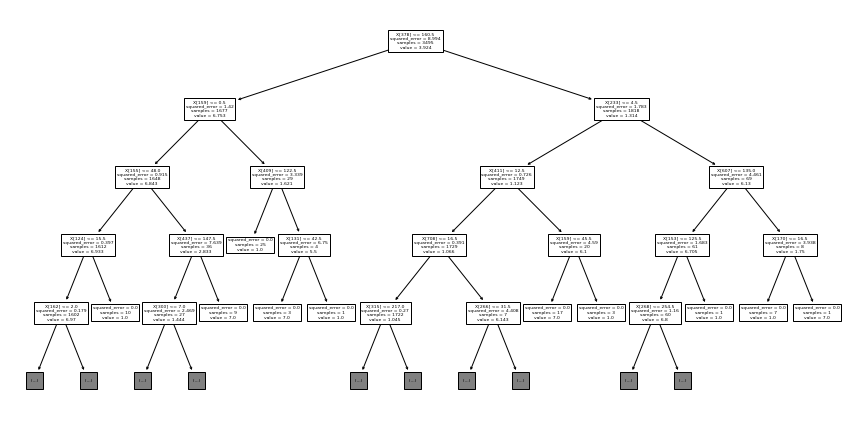

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(r['estimator'][0], max_depth=4)

[Text(0.5625, 0.9166666666666666, 'X[378] <= 150.0\nsquared_error = 8.991\nsamples = 3495\nvalue = 3.906'),
 Text(0.3125, 0.75, 'X[126] <= 4.5\nsquared_error = 1.201\nsamples = 1650\nvalue = 6.793'),
 Text(0.2708333333333333, 0.5833333333333334, 'X[159] <= 0.5\nsquared_error = 0.84\nsamples = 1632\nvalue = 6.857'),
 Text(0.16666666666666666, 0.4166666666666667, 'X[156] <= 44.0\nsquared_error = 0.506\nsamples = 1612\nvalue = 6.914'),
 Text(0.08333333333333333, 0.25, 'X[162] <= 2.0\nsquared_error = 0.313\nsamples = 1597\nvalue = 6.947'),
 Text(0.041666666666666664, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.125, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.25, 0.25, 'X[236] <= 131.0\nsquared_error = 8.64\nsamples = 15\nvalue = 3.4'),
 Text(0.20833333333333334, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.2916666666666667, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.375, 0.4166666666666667, 'X[211] <= 12.0\nsquared_error = 5.76\nsamples = 20\nvalue = 2.2'),
 Text(0.333333333333

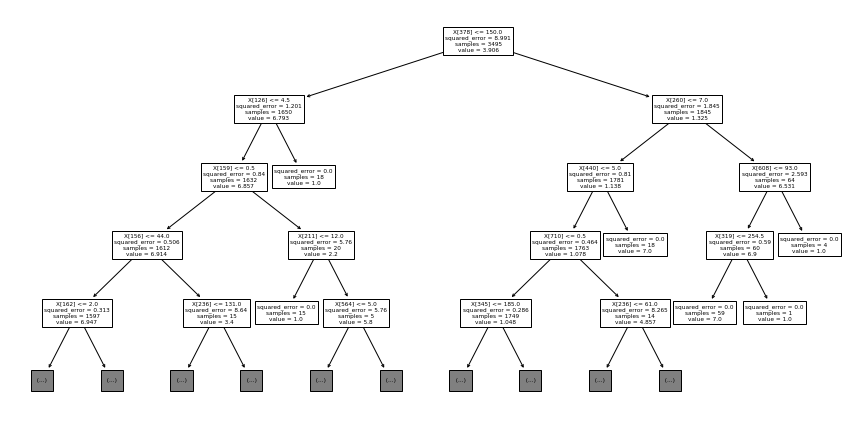

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(r['estimator'][1], max_depth=4)

[Text(0.5096153846153846, 0.9166666666666666, 'X[378] <= 160.5\nsquared_error = 8.99\nsamples = 3495\nvalue = 3.9'),
 Text(0.28846153846153844, 0.75, 'X[159] <= 1.0\nsquared_error = 1.446\nsamples = 1646\nvalue = 6.748'),
 Text(0.19230769230769232, 0.5833333333333334, 'X[155] <= 48.0\nsquared_error = 0.952\nsamples = 1619\nvalue = 6.837'),
 Text(0.11538461538461539, 0.4166666666666667, 'X[124] <= 15.5\nsquared_error = 0.404\nsamples = 1587\nvalue = 6.932'),
 Text(0.07692307692307693, 0.25, 'X[163] <= 1.5\nsquared_error = 0.182\nsamples = 1577\nvalue = 6.97'),
 Text(0.038461538461538464, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.11538461538461539, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.15384615384615385, 0.25, 'squared_error = 0.0\nsamples = 10\nvalue = 1.0'),
 Text(0.2692307692307692, 0.4166666666666667, 'X[215] <= 17.5\nsquared_error = 5.484\nsamples = 32\nvalue = 2.125'),
 Text(0.23076923076923078, 0.25, 'X[484] <= 11.5\nsquared_error = 1.284\nsamples = 27\nvalue = 1.222

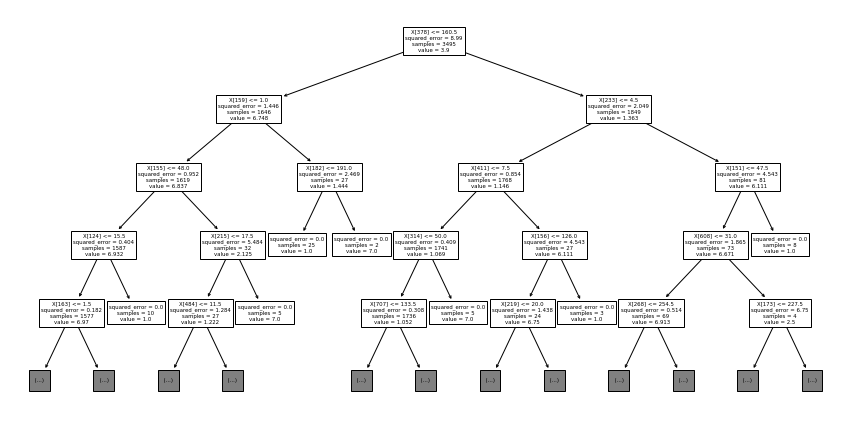

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(r['estimator'][2], max_depth=4)

[Text(0.49609375, 0.9166666666666666, 'X[378] <= 151.5\nsquared_error = 8.996\nsamples = 3495\nvalue = 3.941'),
 Text(0.234375, 0.75, 'X[158] <= 3.5\nsquared_error = 1.234\nsamples = 1660\nvalue = 6.787'),
 Text(0.15625, 0.5833333333333334, 'X[155] <= 121.5\nsquared_error = 0.755\nsamples = 1633\nvalue = 6.871'),
 Text(0.09375, 0.4166666666666667, 'X[161] <= 25.0\nsquared_error = 0.44\nsamples = 1615\nvalue = 6.926'),
 Text(0.0625, 0.25, 'X[124] <= 22.5\nsquared_error = 0.267\nsamples = 1607\nvalue = 6.955'),
 Text(0.03125, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09375, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.125, 0.25, 'squared_error = 0.0\nsamples = 8\nvalue = 1.0'),
 Text(0.21875, 0.4166666666666667, 'X[493] <= 174.0\nsquared_error = 5.0\nsamples = 18\nvalue = 2.0'),
 Text(0.1875, 0.25, 'squared_error = 0.0\nsamples = 15\nvalue = 1.0'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 3\nvalue = 7.0'),
 Text(0.3125, 0.5833333333333334, 'X[207] <= 44.0\nsquared_error =

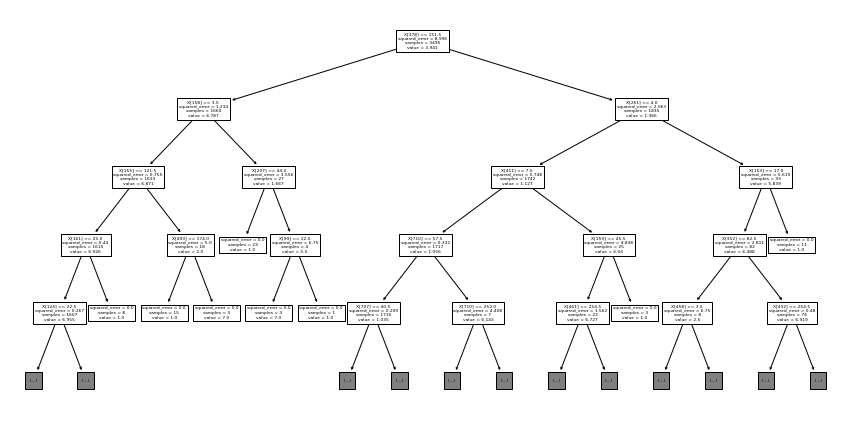

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(r['estimator'][3], max_depth=4)

[Text(0.5370370370370371, 0.9166666666666666, 'X[378] <= 154.0\nsquared_error = 8.995\nsamples = 3496\nvalue = 3.928'),
 Text(0.2777777777777778, 0.75, 'X[125] <= 3.0\nsquared_error = 1.236\nsamples = 1657\nvalue = 6.786'),
 Text(0.24074074074074073, 0.5833333333333334, 'X[159] <= 0.5\nsquared_error = 0.878\nsamples = 1639\nvalue = 6.85'),
 Text(0.14814814814814814, 0.4166666666666667, 'X[155] <= 121.5\nsquared_error = 0.505\nsamples = 1617\nvalue = 6.915'),
 Text(0.07407407407407407, 0.25, 'X[162] <= 2.0\nsquared_error = 0.223\nsamples = 1602\nvalue = 6.963'),
 Text(0.037037037037037035, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1111111111111111, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.2222222222222222, 0.25, 'X[684] <= 37.5\nsquared_error = 4.16\nsamples = 15\nvalue = 1.8'),
 Text(0.18518518518518517, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.25925925925925924, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.4166666666666667, 'X[409] <= 122.5\nsqua

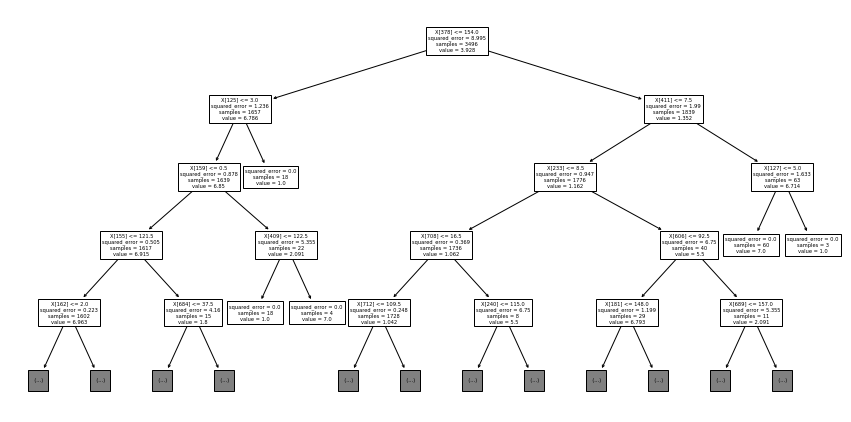

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(r['estimator'][4], max_depth=4)

In [ ]:
cv_results = cross_validate(DecisionTreeRegressor(max_depth=5),
                   X,y, cv=5,return_train_score = True, return_estimator=True)
cv_results

{'fit_time': array([0.19815707, 0.1961143 , 0.21039963, 0.18842006, 0.19135761]),
 'score_time': array([0.00802755, 0.0092957 , 0.00818634, 0.00801659, 0.00763774]),
 'estimator': [DecisionTreeRegressor(max_depth=5),
  DecisionTreeRegressor(max_depth=5),
  DecisionTreeRegressor(max_depth=5),
  DecisionTreeRegressor(max_depth=5),
  DecisionTreeRegressor(max_depth=5)],
 'test_score': array([0.94987139, 0.92721927, 0.93605798, 0.94505075, 0.9388941 ]),
 'train_score': array([0.98519181, 0.97744097, 0.98063521, 0.98745   , 0.98183224])}

In [ ]:
cv_results2= cross_validate(KNeighborsRegressor(n_neighbors=4), X, y, cv=5, return_train_score=True, return_estimator=True)
cv_results2

{'fit_time': array([0.04006147, 0.02358341, 0.0134294 , 0.01336861, 0.01363683]),
 'score_time': array([0.53082013, 0.26587558, 0.24861121, 0.28820753, 0.25125432]),
 'estimator': [KNeighborsRegressor(n_neighbors=4),
  KNeighborsRegressor(n_neighbors=4),
  KNeighborsRegressor(n_neighbors=4),
  KNeighborsRegressor(n_neighbors=4),
  KNeighborsRegressor(n_neighbors=4)],
 'test_score': array([0.96878948, 0.97482627, 0.9771167 , 0.97561294, 0.97705771]),
 'train_score': array([0.98597087, 0.98560832, 0.98703841, 0.98704788, 0.98547502])}

In [ ]:
print("Promedio accuracy train DecisionTreeRegresor:",cv_results['train_score'].mean())
print("Promedio accuracy test DecisionTreeRegresor:",cv_results['test_score'].mean())
print("Promedio accuracy train KNN:",cv_results2['train_score'].mean())
print("Promedio accuracy test KNN:",cv_results2['test_score'].mean())

Promedio accuracy train DecisionTreeRegresor: 0.9825100453335148
Promedio accuracy test DecisionTreeRegresor: 0.9394186995286036
Promedio accuracy train KNN: 0.9862281018228936
Promedio accuracy test KNN: 0.9746806203411023
